## Data preprocessing
Start by importing the dataset as instructed in the uci archive.

In [88]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 


### Examine and prepare data
Imported data is now merged to a single dataframe, ready for handling.
Description read using the describe method from pandas.


In [89]:
df = pd.concat([X, y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [90]:
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,...,NaN,NaN,NaN,2,3,2,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,201,259,354,374,NaN,...,NaN,NaN,NaN,251,260,364,317,323,339,248
mean,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Modification pipeline
The next code cell restructures the data frame to fit criteria set by the task.

In [91]:
# Map for replacing short names to full length
column_map = {
    'age': 'age',
    'bp': 'blood pressure',
    'sg': 'specific gravity',
    'al': 'albumin',
    'su': 'sugar',
    'bgr': 'blood glucose random',
    'bu': 'blood urea',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed cell volume',
    'wbcc': 'white blood cell count',
    'rbcc': 'red blood cell count',
    'class': 'class'
}

class_map = {
    'ckd': 'a',
    'notckd': 'c'
}

# Rename columns according to the column map
df_modified = df[list(column_map.keys())].rename(columns=column_map)

# Remove white space to fix inconsistent values
df_modified['class'] = df_modified['class'].str.strip()
# Then rename all instances according to map
df_modified['class'] = df_modified['class'].map(class_map)

# Convert hemoglobin from g/dl --> g/l
df_modified['hemoglobin'] = df_modified['hemoglobin'] * 10

rows_before_clean = df_modified.shape[0]
# Remove rows with >=3 missing values
df_modified = df_modified[df_modified.isna().sum(axis=1) < 3]
rows_after_clean = df_modified.shape[0]

# Check that modified columns look correct
df_modified.info()


<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     262 non-null    float64
 1   blood pressure          262 non-null    float64
 2   specific gravity        264 non-null    float64
 3   albumin                 265 non-null    float64
 4   sugar                   265 non-null    float64
 5   blood glucose random    255 non-null    float64
 6   blood urea              260 non-null    float64
 7   sodium                  244 non-null    float64
 8   potassium               244 non-null    float64
 9   hemoglobin              262 non-null    float64
 10  packed cell volume      263 non-null    float64
 11  white blood cell count  249 non-null    float64
 12  red blood cell count    244 non-null    float64
 13  class                   265 non-null    object 
dtypes: float64(13), object(1)
memory usage: 31.1+ K

### Confirming modifications
The next code cells confirm that earlier modifications worked as intended.
The class column should only display a/c values, with invalid values trimmed.
Hemoglobin mean should be 10x higher than the previous check (g/dl --> g/l).
The removal of rows is also expected to shift the mean.
Row count should have changed after cleanup.

In [92]:
print("Row count before cleanup: " + str(rows_before_clean))
print("Row count after cleanup: " + str(rows_after_clean))
print("Number of rows removed: " + str(rows_before_clean - rows_after_clean))

Row count before cleanup: 400
Row count after cleanup: 265
Number of rows removed: 135


In [93]:
# check class was modified correctly
print(df_modified['class'].value_counts())

class
c    139
a    126
Name: count, dtype: int64


In [94]:
# hemoglobin check
print("Hemoglobin mean (g/l): " + str(df_modified['hemoglobin'].mean()))

Hemoglobin mean (g/l): 130.19847328244273


### Splitting the data
Next, the data frame will be split in two between the a / c individuals.
As there are 139 control and 126 affected counts in "class", it is expected that the same numbers are
reflected in the data frame's split.

In [95]:
# split the frame by filtering either affected or control rows
df_a = df_modified[df_modified['class'] == 'a']
df_c = df_modified[df_modified['class'] == 'c']

# verify the split worked as expected
print("Affected frame row count: " + str(df_a.shape[0]))
print("Control frame row count: " + str(df_c.shape[0]))

Affected frame row count: 126
Control frame row count: 139


### Analysis
Using the "describe" method, the next cells will generate statistics for both frames

In [96]:
print("Affected frame:")
df_a.describe()

Affected frame:


,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,106.432000,32.440000,9450.442478,3.976852
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,21.896507,7.150908,3720.458015,0.844510
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2600.000000,2.100000
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,95.000000,29.000000,7100.000000,3.400000
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,108.000000,33.000000,9200.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,120.000000,37.000000,11000.000000,4.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,145.000000,47.000000,161.000000,52.000000,26400.000000,8.000000


In [97]:
print("Control frame:")
df_c.describe()

Control frame:


,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,151.883212,46.246377,7708.088235,5.380882
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,12.845270,4.107695,1815.164727,0.592986
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,141.000000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,150.000000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,162.000000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,178.000000,54.000000,11000.000000,6.500000


### Histograms
The next cells will create histograms from both frames using matplotlib.
By using the select_dtypes method, numerical columns can be separated from each frame.

In [98]:
# Start by importing matplotlib
import matplotlib.pyplot as plt

# get numerical columns only
values = df_modified.select_dtypes(include="number").columns

Affected frame histograms:


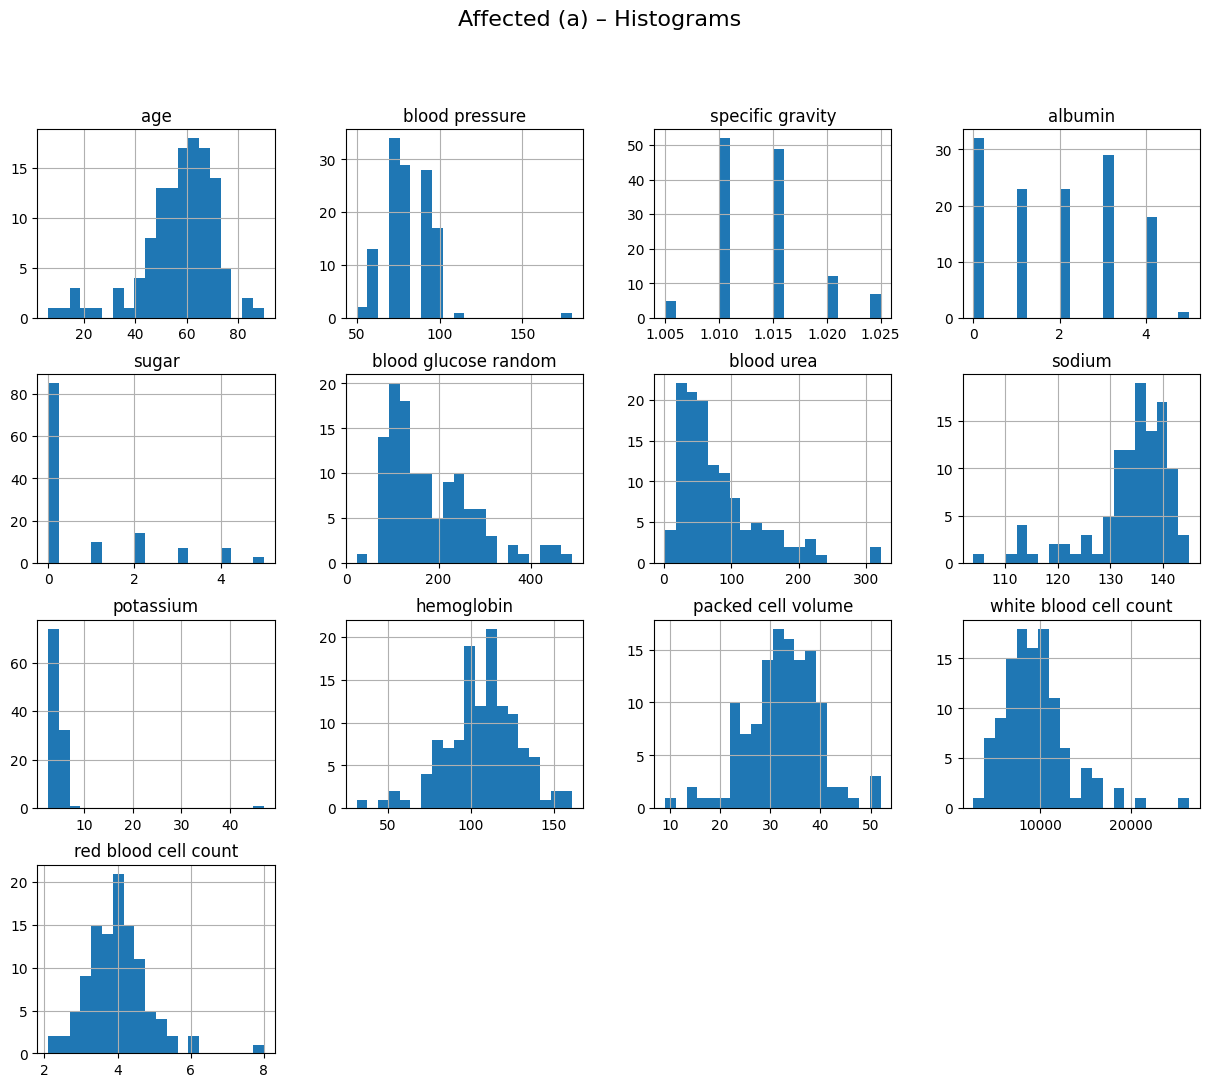

In [99]:
print("Affected frame histograms:")
df_a[values].hist(figsize=(15, 12), bins=20)
plt.suptitle("Affected (a) – Histograms", fontsize=16)
plt.show()

Control frame histograms:


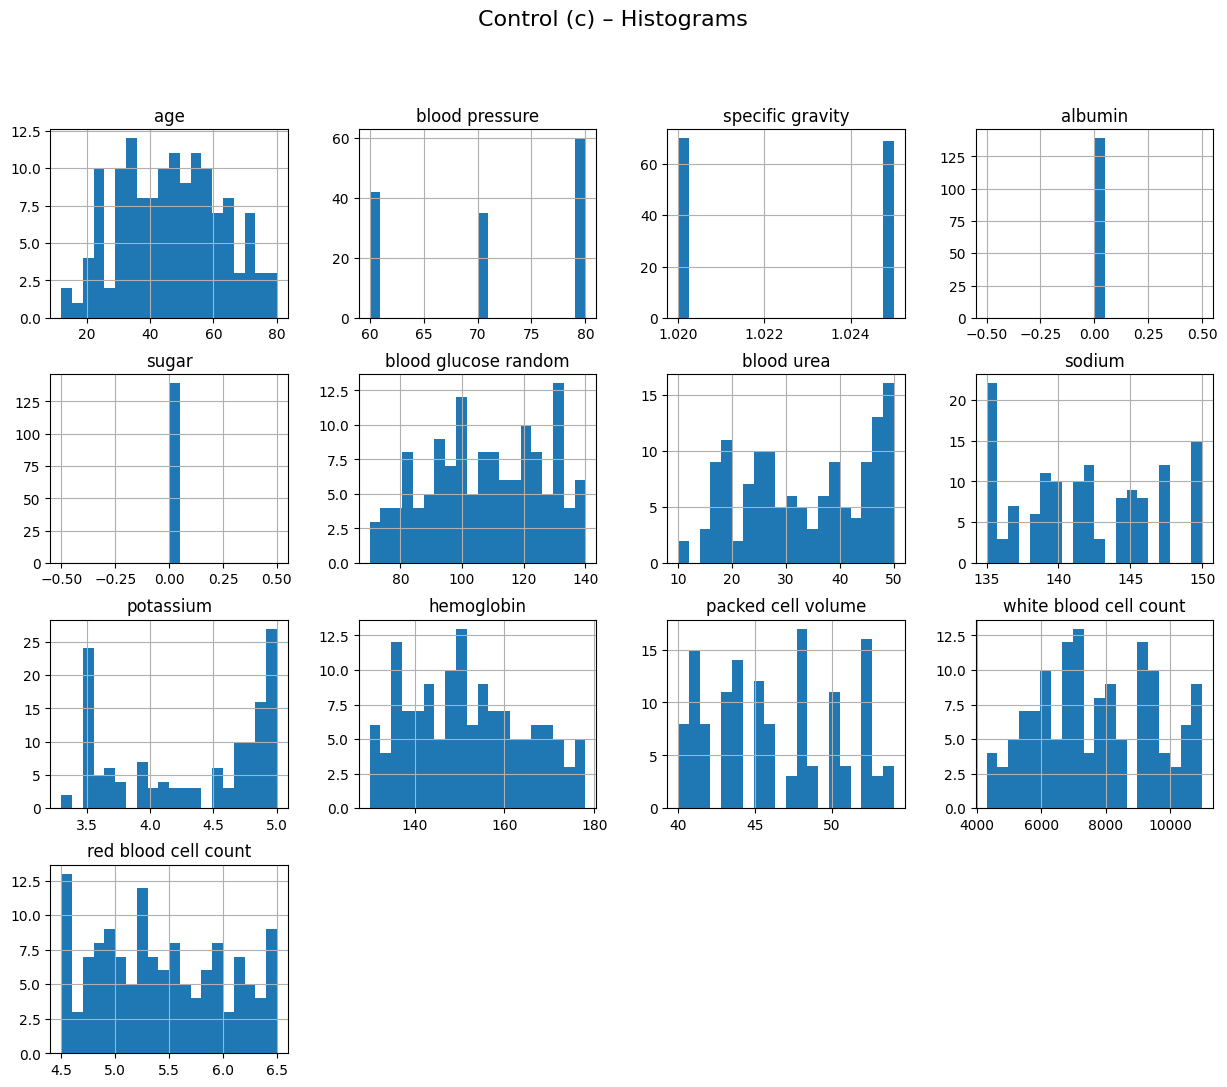

In [100]:
print("Control frame histograms:")
df_c[values].hist(figsize=(15, 12), bins=20)
plt.suptitle("Control (c) – Histograms", fontsize=16)
plt.show()

### Outliers 
I have noticed outliers in red blood cell count, potassium, blood urea, white blood cell count and blood pressure in the affected group. The control group does not seem to have significant outliers.
I would handle such data by either clamping between set percentiles of the data or ignoring values that are medically impossible and thus most likely errors. Though in some cases, it could be useful to keep even extreme data, if it could indicate the presence of other conditions.

### Correlation matrix
The next cells create correlation matrices for both frames and visualize them using matplotlib.
Seaborn is used for generating a heatmap.

In [101]:
# Import seaborn for visualization
import seaborn as sns

# Using the previosly established "values" variable, we can quickly create the matrices
corr_a = df_a[values].corr()
corr_c = df_c[values].corr()

Affected frame correlation matrix:


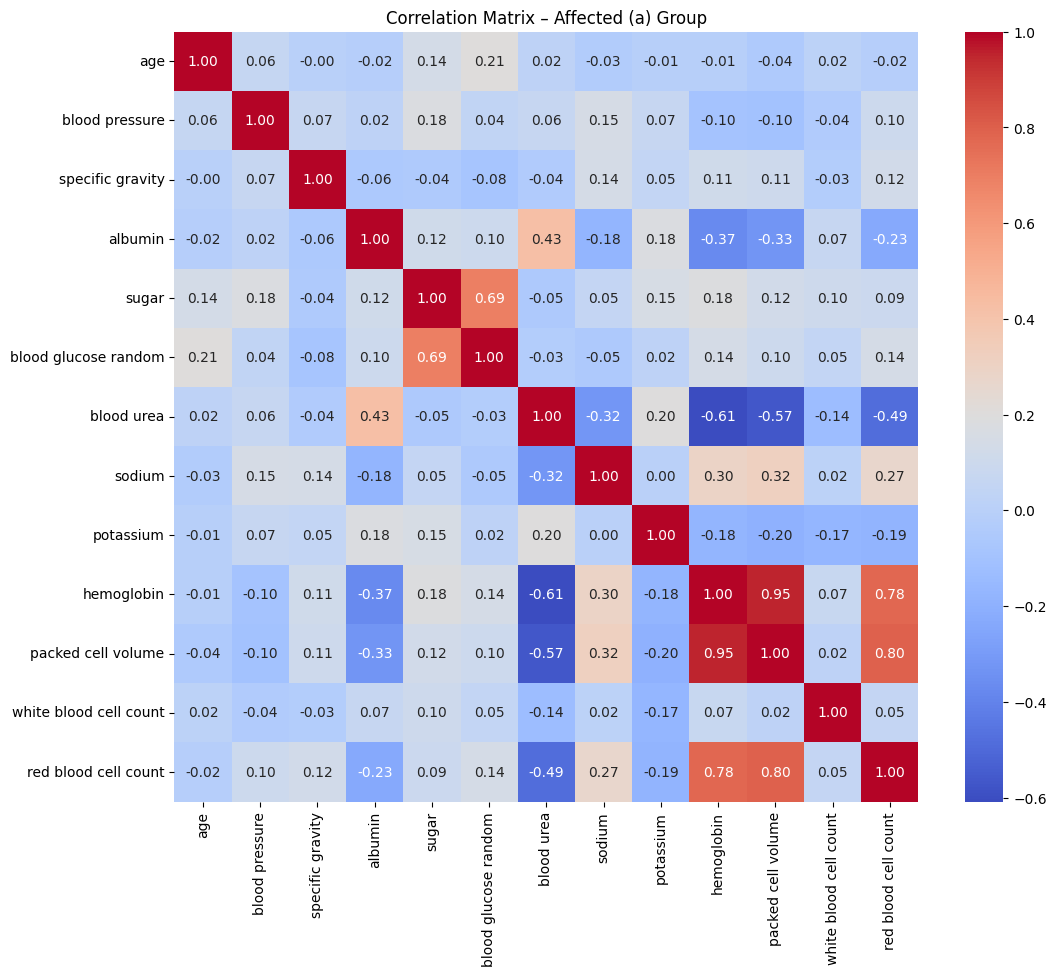

In [102]:
print("Affected frame correlation matrix:")
# Heatmap for affected group
plt.figure(figsize=(12, 10))
sns.heatmap(corr_a, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix – Affected (a) Group")
plt.show()

Control f rame correlation matrix:


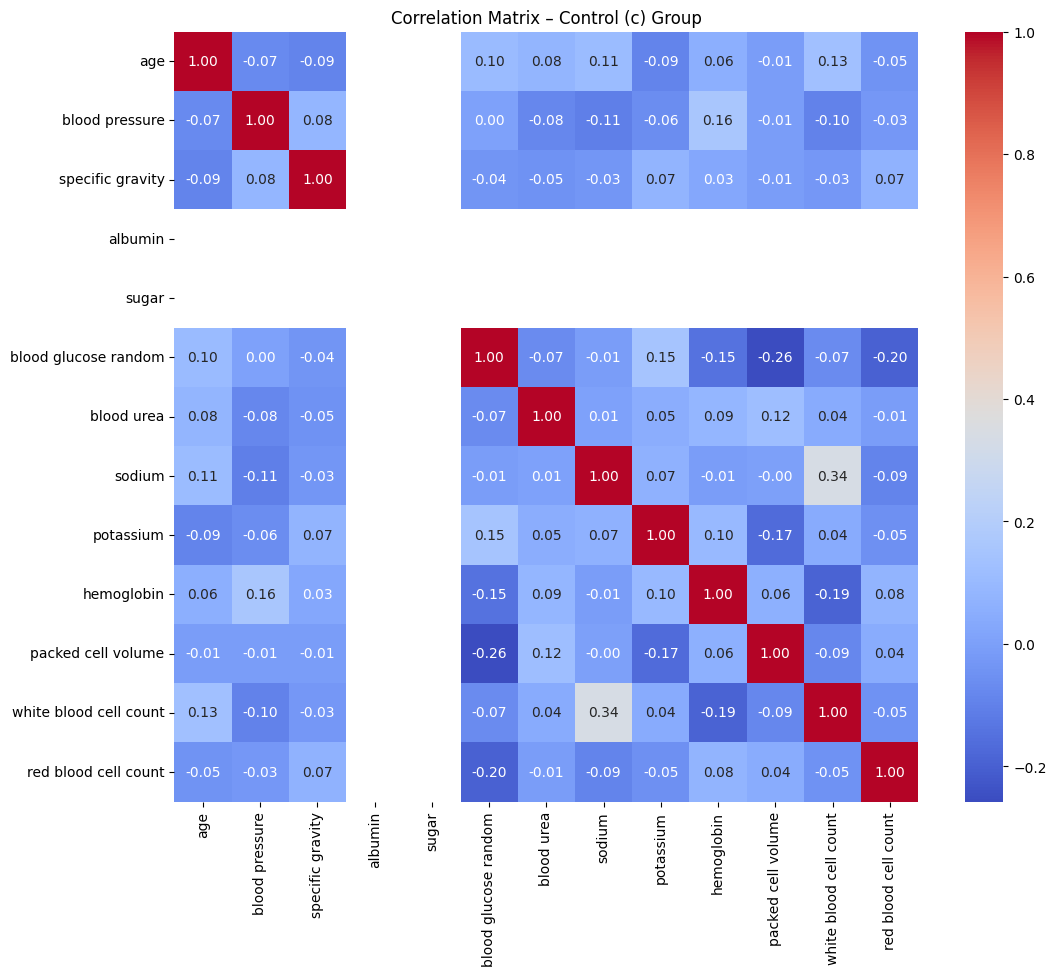

In [103]:
print("Control f rame correlation matrix:")
# Heatmap for control group
plt.figure(figsize=(12, 10))
sns.heatmap(corr_c, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix – Control (c) Group")
plt.show()

## Final analysis
When looking at both matrices, the first thing I noticed was the distinct lack of specific values in the control frame, leaving the matrix quite empty. The sugar value is explained by the fact that the average healthy person should have close to 0 sugar in their urine, or trace amounts that don't show up on scans like this. The same story is with albumin, being on a scale of 30mg/g of urine. 
From these observations, I would at first conclude that finding significant spikes in these values could be a strong indication of kidney disease, or at least a sign of the kidneys not filtering urine properly.

I have also noticed that in the control group, age and white blood cell count have a linear relationship of 0.13, while with the affected group, this is reduced to 0.02, which seems to indicate that chronic kidney disease weakens the immune system.

Another relationship that caught my eye is with the amount of albumin and urea in blood seem to be linked, as when one grows the other does too.

To conclude; I am not a biologist and don't really understand any of these values, but even then, I'm able to see some extreme changes that seem to be signs of disease. If these observations are consistent with chronic kidney disease, I would think that diagnosing it is quite straight forward. Though, I imagine there are several different conditions that could elevate values related to this one, and one individual could be suffering from multiple conditions at the same time.